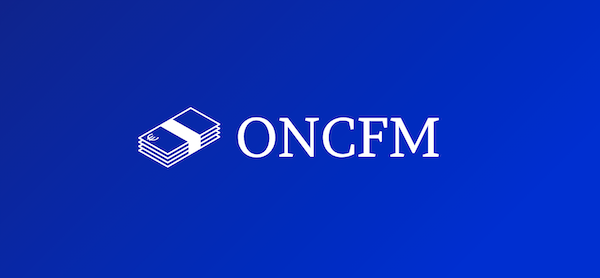

In [1]:
# import librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pca
from pca import pca
from scipy.stats import norm
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import du fichier
df = pd.read_csv("billets.csv",sep=';')
df_prod = pd.read_csv("billets_production.csv",sep=',')

# Compréhension des données


In [3]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [7]:
df.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [8]:
df[df.duplicated()==True]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


In [9]:
df['is_genuine'] = df['is_genuine'].apply(lambda x: 0 if x == True else 1)

In [10]:
#cat.codes
df['is_genuine'] = df['is_genuine'].astype('category').cat.codes

In [11]:
description = df.groupby('is_genuine').describe().T
print(description)

is_genuine                    0           1
diagonal     count  1000.000000  500.000000
             mean    171.987080  171.901160
             std       0.300441    0.306861
             min     171.040000  171.040000
             25%     171.790000  171.690000
             50%     171.990000  171.910000
             75%     172.200000  172.092500
             max     172.920000  173.010000
height_left  count  1000.000000  500.000000
             mean    103.949130  104.190340
             std       0.300231    0.223758
             min     103.140000  103.510000
             25%     103.740000  104.040000
             50%     103.950000  104.180000
             75%     104.140000  104.332500
             max     104.860000  104.880000
height_right count  1000.000000  500.000000
             mean    103.808650  104.143620
             std       0.291570    0.270878
             min     102.820000  103.430000
             25%     103.610000  103.950000
             50%     103.810000 

# Gestion des valeurs manquantes

In [12]:
# Elimine les 37 valeurs nan (feature margin_low)
df_na = df[df['margin_low'].isnull()]

In [13]:
#visualisation des valeurs manquantes 
df_na

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,0,171.94,103.89,103.45,NaN,3.25,112.79
99,0,171.93,104.07,104.18,NaN,3.14,113.08
151,0,172.07,103.80,104.38,NaN,3.02,112.93
197,0,171.45,103.66,103.80,NaN,3.62,113.27
241,0,171.83,104.14,104.06,NaN,3.02,112.36
251,0,171.80,103.26,102.82,NaN,2.95,113.22
284,0,171.92,103.83,103.76,NaN,3.23,113.29
334,0,171.85,103.70,103.96,NaN,3.00,113.36
410,0,172.56,103.72,103.51,NaN,3.12,112.95
413,0,172.30,103.66,103.50,NaN,3.16,112.95


In [14]:
# dropna() margin_low
df_val=df.dropna()

## Imputation par Regression linéaire

In [15]:
lr = LinearRegression()

In [16]:
y = df_val['margin_low']
X = df_val.drop('margin_low', axis=1)

In [17]:
# model 
lr.fit(X,y)

LinearRegression()

In [18]:
# drop margin_low
df_na.drop('margin_low', axis = 1, inplace = True)

In [19]:
pred = lr.predict(df_na)

In [20]:
df_na['margin_low'] = pred

In [21]:
df_na

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
72,0,171.94,103.89,103.45,3.25,112.79,4.064954
99,0,171.93,104.07,104.18,3.14,113.08,4.111990
151,0,172.07,103.80,104.38,3.02,112.93,4.134003
197,0,171.45,103.66,103.80,3.62,113.27,3.993571
241,0,171.83,104.14,104.06,3.02,112.36,4.140399
251,0,171.80,103.26,102.82,2.95,113.22,4.094284
284,0,171.92,103.83,103.76,3.23,113.29,4.074124
334,0,171.85,103.70,103.96,3.00,113.36,4.125390
410,0,172.56,103.72,103.51,3.12,112.95,4.080728
413,0,172.30,103.66,103.50,3.16,112.95,4.073633


In [22]:
df = pd.concat([df_val, df_na] ,axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int8   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int8(1)
memory usage: 83.5 KB


## P-value 
Nous pouvons maintenant supprimer la variable correspondante avec la valeur P la plus élevée et réexécuter le code. Répétez ces étapes jusqu'à ce que nous nous retrouvons avec des variables dont la valeur de p est inférieure au seuil de signification.

In [23]:
reg = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=df).fit()
reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     409.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          5.35e-311
Time:                        01:31:29   Log-Likelihood:                -774.98
No. Observations:                1500   AIC:                             1564.
Df Residuals:                    1493   BIC:                             1601.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7262      8.124      0.212      0.832     -14.210      17.663
is_genuine       1.1406      0.048     23.714      0.000       1.046       1.235
diagonal        -0.0130      0.035     -0.373      0.709      -0.081       0.055
height_left      0.0283      0.038      0.742      0.458      -0.046       0.103
height_right     0.0267      0.037      0.723      0.470      -0.046       0.099
margin_up       -0.2128      0.057     -3.733      0.000      -0.325      -0.101
length          -0.0039      0.023     -0.170      0.865      -0.049       0.041
==============================================================================
Omnibus:                       26.428   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.871
Skew:                           0.061   Prob(JB):                     2.44e-11
Kurtosis:                       3.876   Cond. No.                     1.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On enlève la feature **length**

In [24]:
reg = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=df).fit()
reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     491.4
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          2.33e-312
Time:                        01:31:29   Log-Likelihood:                -775.00
No. Observations:                1500   AIC:                             1562.
Df Residuals:                    1494   BIC:                             1594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2741      7.675      0.166      0.868     -13.782      16.330
is_genuine       1.1467      0.032     36.027      0.000       1.084       1.209
diagonal        -0.0128      0.035     -0.368      0.713      -0.081       0.056
height_left      0.0283      0.038      0.742      0.458      -0.046       0.103
height_right     0.0266      0.037      0.719      0.472      -0.046       0.099
margin_up       -0.2127      0.057     -3.732      0.000      -0.325      -0.101
==============================================================================
Omnibus:                       26.505   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.102
Skew:                           0.061   Prob(JB):                     2.18e-11
Kurtosis:                       3.878   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On enlève la feature **diagonal**

In [25]:
reg = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=df).fit()
reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     614.6
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          9.45e-314
Time:                        01:31:29   Log-Likelihood:                -775.07
No. Observations:                1500   AIC:                             1560.
Df Residuals:                    1495   BIC:                             1587.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7692      5.304     -0.145      0.885     -11.173       9.635
is_genuine       1.1484      0.031     36.484      0.000       1.087       1.210
height_left      0.0272      0.038      0.717      0.473      -0.047       0.102
height_right     0.0261      0.037      0.705      0.481      -0.046       0.099
margin_up       -0.2133      0.057     -3.746      0.000      -0.325      -0.102
==============================================================================
Omnibus:                       26.765   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.868
Skew:                           0.059   Prob(JB):                     1.48e-11
Kurtosis:                       3.885   Cond. No.                     7.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On enlève la feature **height_right**

In [26]:
reg = smf.ols('margin_low~is_genuine+height_left+margin_up', data=df).fit()
reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     819.6
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          3.90e-315
Time:                        01:31:29   Log-Likelihood:                -775.31
No. Observations:                1500   AIC:                             1559.
Df Residuals:                    1496   BIC:                             1580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7346      3.939      0.440      0.660      -5.991       9.460
is_genuine      1.1565      0.029     39.442      0.000       1.099       1.214
height_left     0.0292      0.038      0.769      0.442      -0.045       0.103
margin_up      -0.2126      0.057     -3.735      0.000      -0.324      -0.101
==============================================================================
Omnibus:                       26.953   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.405
Skew:                           0.059   Prob(JB):                     1.13e-11
Kurtosis:                       3.890   Cond. No.                     3.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On enlève la feature **height_left**

In [27]:
reg = smf.ols('margin_low~is_genuine+margin_up', data=df).fit()
reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     1229.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          1.32e-316
Time:                        01:31:29   Log-Likelihood:                -775.61
No. Observations:                1500   AIC:                             1557.
Df Residuals:                    1497   BIC:                             1573.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7622      0.174     27.341      0.000       4.421       5.104
is_genuine     1.1633      0.028     41.578      0.000       1.108       1.218
margin_up     -0.2117      0.057     -3.719      0.000      -0.323      -0.100
==============================================================================
Omnibus:                       26.833   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.158
Skew:                           0.057   Prob(JB):                     1.28e-11
Kurtosis:                       3.889   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analyse des données

In [28]:
description = df.groupby('is_genuine').describe().T
print(description)

is_genuine                    0           1
diagonal     count  1000.000000  500.000000
             mean    171.987080  171.901160
             std       0.300441    0.306861
             min     171.040000  171.040000
             25%     171.790000  171.690000
             50%     171.990000  171.910000
             75%     172.200000  172.092500
             max     172.920000  173.010000
height_left  count  1000.000000  500.000000
             mean    103.949130  104.190340
             std       0.300231    0.223758
             min     103.140000  103.510000
             25%     103.740000  104.040000
             50%     103.950000  104.180000
             75%     104.140000  104.332500
             max     104.860000  104.880000
height_right count  1000.000000  500.000000
             mean    103.808650  104.143620
             std       0.291570    0.270878
             min     102.820000  103.430000
             25%     103.610000  103.950000
             50%     103.810000 

## Matrice de corrélation

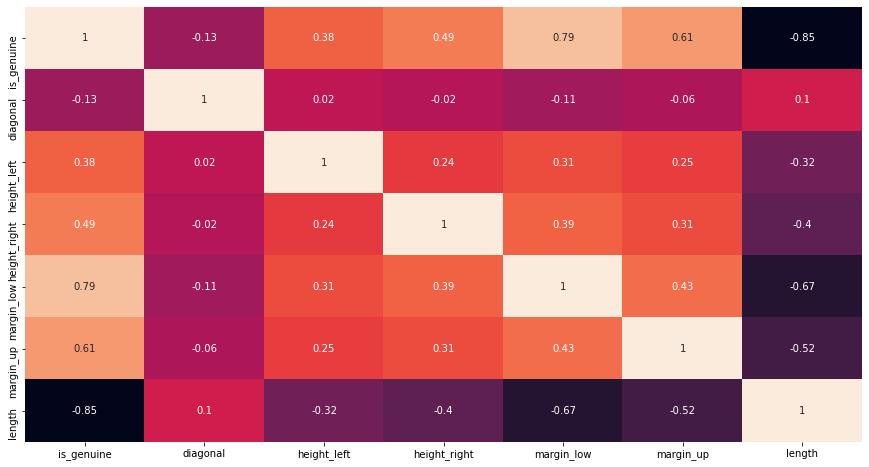

In [29]:
plt.figure(figsize=(15, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cbar=None);

## Pairplot

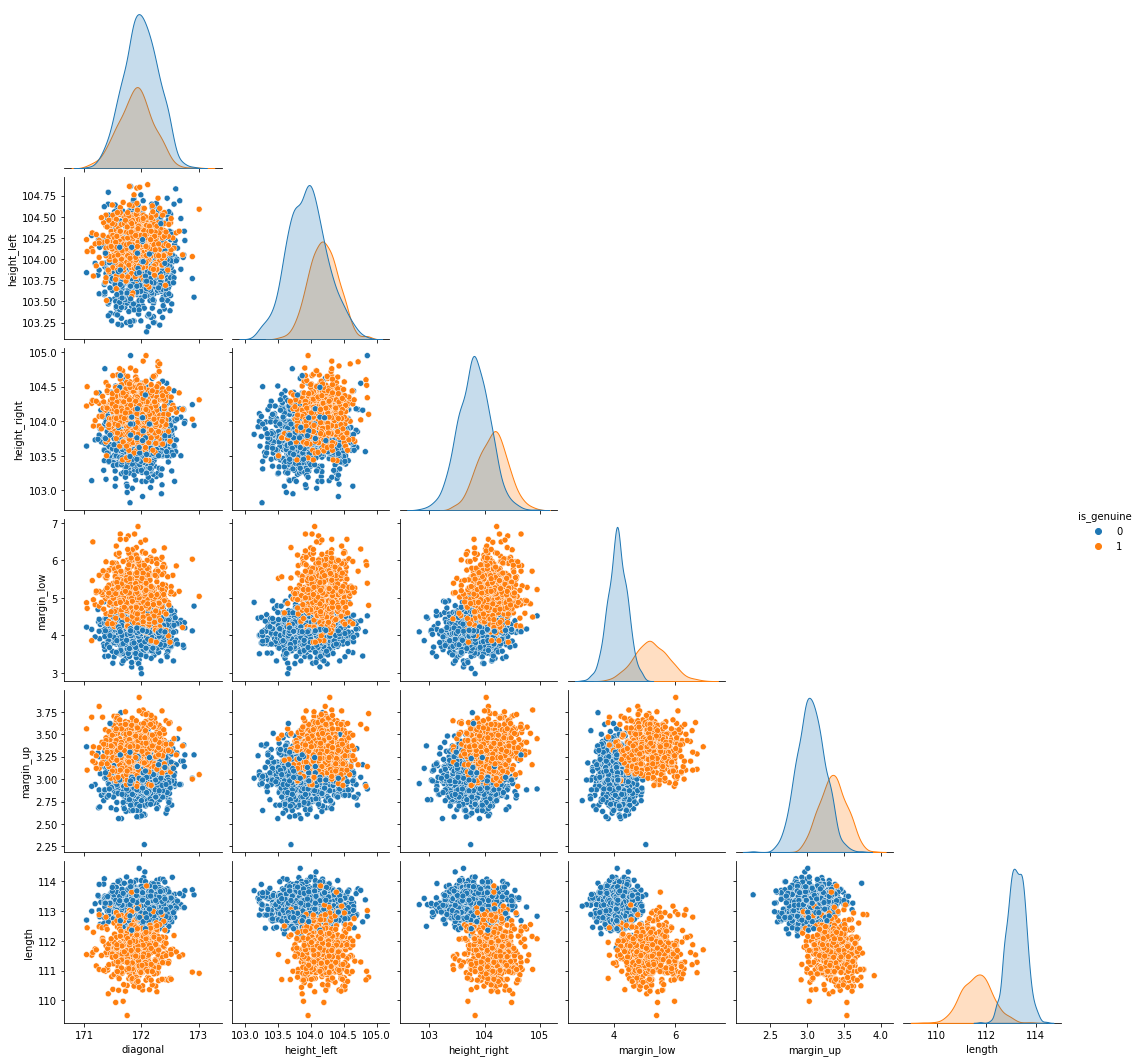

In [30]:
sns.pairplot(df, hue='is_genuine', corner=True)
plt.show()

## Boxplot

In [31]:
pd.options.display.max_columns = None

In [32]:
df.groupby("is_genuine").median()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
0,171.99,103.95,103.81,4.110995,3.05,113.205
1,171.91,104.18,104.16,5.195000,3.35,111.630


In [33]:
df.groupby("is_genuine").mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
0,171.98708,103.94913,103.80865,4.116122,3.05213,113.20243
1,171.90116,104.19034,104.14362,5.216290,3.35016,111.63064


diagonal


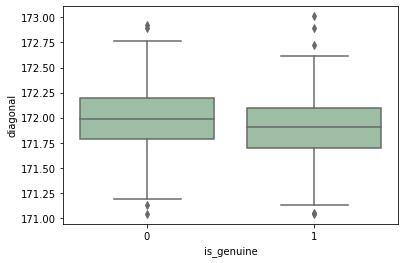

height_left


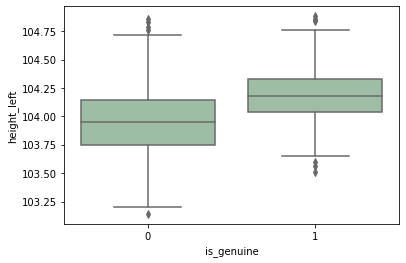

height_right


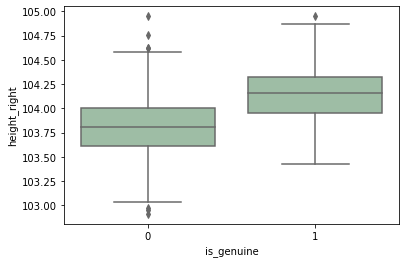

margin_low


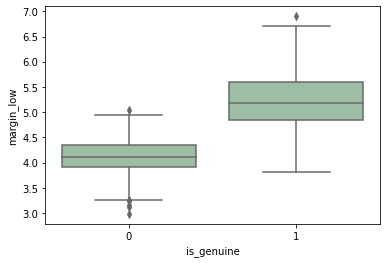

margin_up


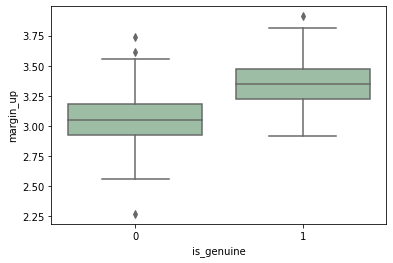

length


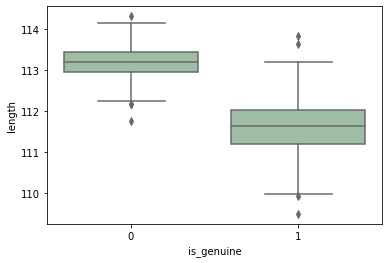

In [34]:
# box plot par feature en fonction de la nature du billet (vrai/faux)
for col in df.select_dtypes('float'):
    plt.figure()
    sns.boxplot(x='is_genuine', y=df_val[col], data=df, color='#99c2a2')
    print(col)
    plt.show()

diagonal


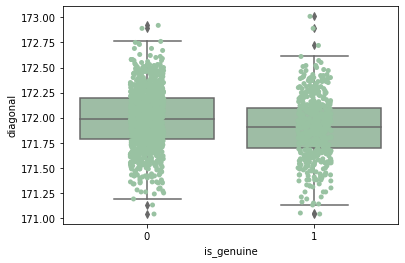

height_left


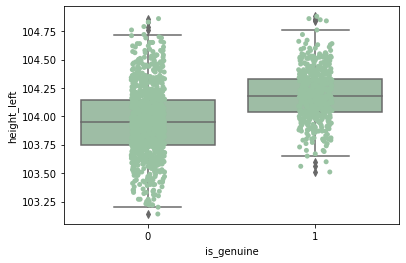

height_right


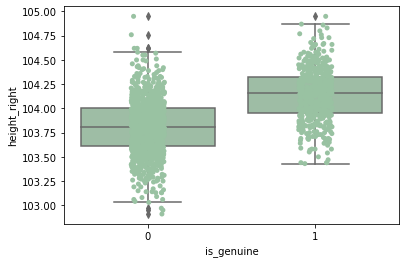

margin_low


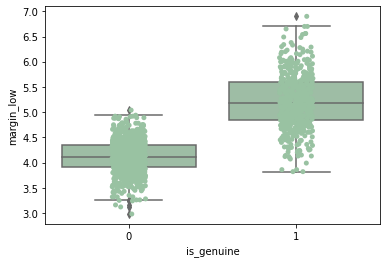

margin_up


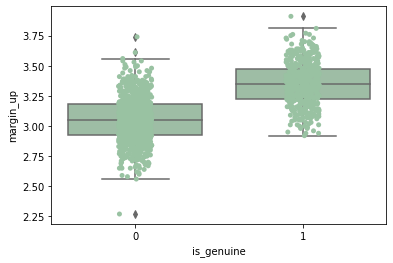

length


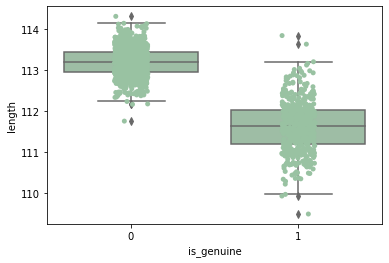

In [35]:
# strip plot par feature en fonction de la nature du billet (vrai/faux)
for col in df.select_dtypes('float'):
    plt.figure()
    ax = sns.boxplot(x='is_genuine', y=df_val[col], data=df, color='#99c2a2')
    ax = sns.stripplot(x='is_genuine', y=df_val[col], data=df, color='#99c2a2')
    print(col)
    plt.show()

## Displot

diagonal


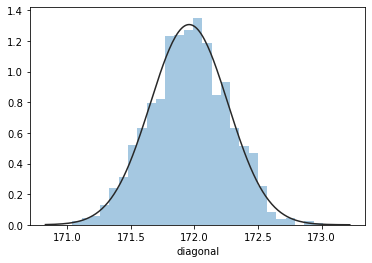

height_left


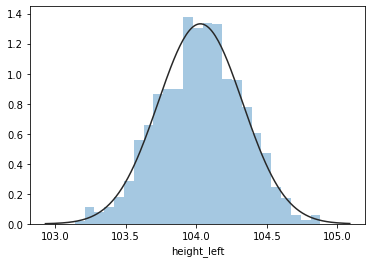

height_right


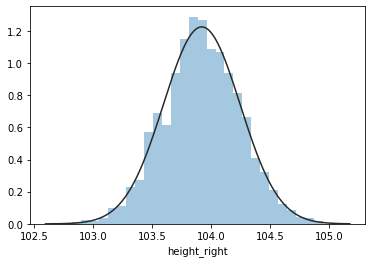

margin_low


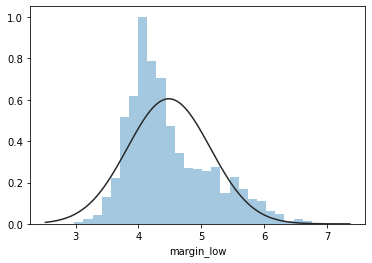

margin_up


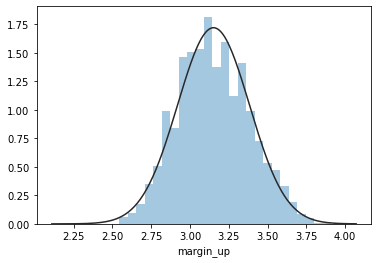

length


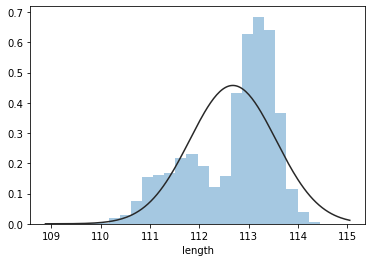

In [36]:
# verification de la distribution gausienne, test de normalité
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col], fit=norm, kde=False)
    print(col)
    plt.show()

In [37]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('float'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

diagonal-------------------------------------------------------------- 0.9986858367919922 0.323654443025589
On ne peux pas rejetter H0: la distribution suit une loi normale
height_left----------------------------------------------------------- 0.9979056715965271 0.051517147570848465
On ne peux pas rejetter H0: la distribution suit une loi normale
height_right---------------------------------------------------------- 0.9995181560516357 0.9806451797485352
On ne peux pas rejetter H0: la distribution suit une loi normale
margin_low------------------------------------------------------------ 0.93565833568573 5.9671849827058915e-25
On rejette H0 : la distribution ne suit pas une loi normale
margin_up------------------------------------------------------------- 0.996167778968811 0.000814208120573312
On rejette H0 : la distribution ne suit pas une loi normale
length---------------------------------------------------------------- 0.9176015853881836 7.865591300479774e-28
On rejette H0 : la distr

diagonal


<Figure size 432x288 with 0 Axes>

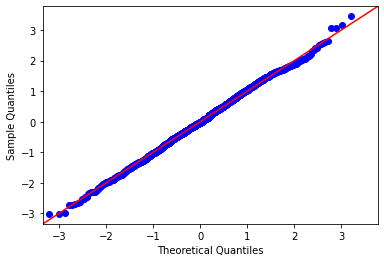

height_left


<Figure size 432x288 with 0 Axes>

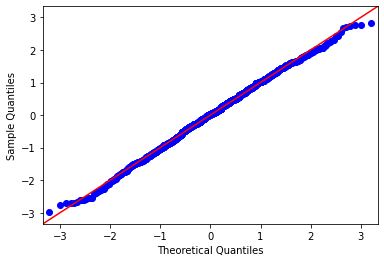

height_right


<Figure size 432x288 with 0 Axes>

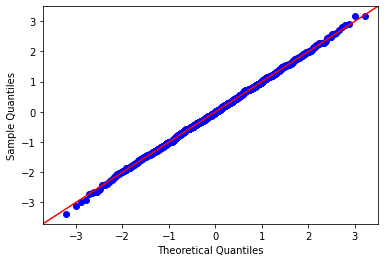

margin_low


<Figure size 432x288 with 0 Axes>

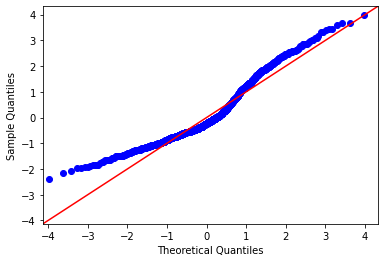

margin_up


<Figure size 432x288 with 0 Axes>

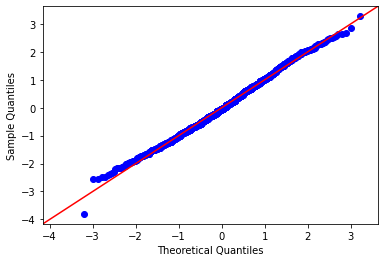

length


<Figure size 432x288 with 0 Axes>

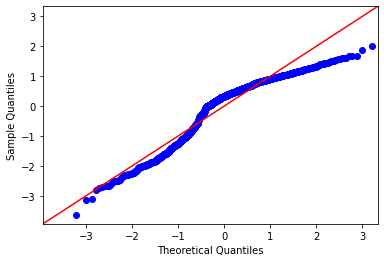

In [38]:
# qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('float'):
    plt.figure()
    sm.qqplot(df[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

# Normalisation

## Transformation Yeo-Johnson

In [39]:
t = df.copy()

In [40]:
X_t = t.select_dtypes('float')

In [41]:
power = PowerTransformer(method='yeo-johnson')

In [42]:
X_trans = power.fit_transform(X_t)

In [43]:
df_norm = pd.DataFrame(X_trans)

In [44]:
df_norm

,0,1,2,3,4,5
0,-0.491040,2.891676,3.163688,0.249099,-1.138084,-0.021901
1,-1.624263,-2.173497,-0.799686,-1.252987,-0.683324,0.352870
2,2.426018,1.527647,-1.291158,0.052905,-0.909273,0.462342
3,-1.945262,-0.413627,0.060449,-1.651656,-0.593729,1.070675
4,-0.751402,0.832460,-1.414022,-0.628895,1.393219,-0.386374
...,...,...,...,...,...,...
1495,0.690484,1.562812,-0.492503,1.249221,-0.954804,-1.519518
1496,0.393579,0.388793,0.767043,1.141634,1.070064,-0.660819
1497,-0.783891,1.457432,0.613431,1.114432,1.906335,-1.951599
1498,2.324954,1.004814,1.504412,1.112212,1.710702,-1.353337


In [45]:
df_norm = df_norm.rename(columns={0:'diagonal', 1: 'height_left',
                                  2: 'height_right', 3: 'margin_low',
                                  4: 'margin_up', 5: 'length'})

diagonal


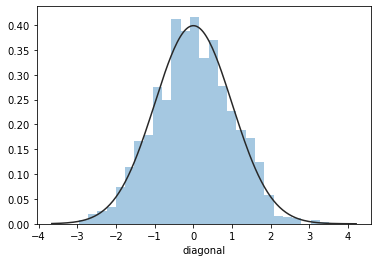

height_left


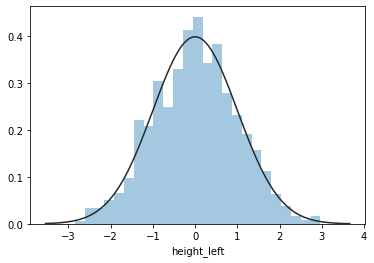

height_right


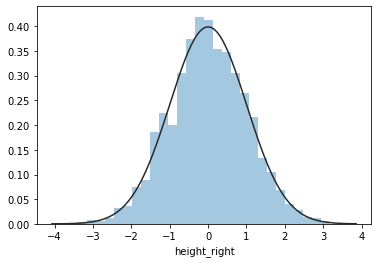

margin_low


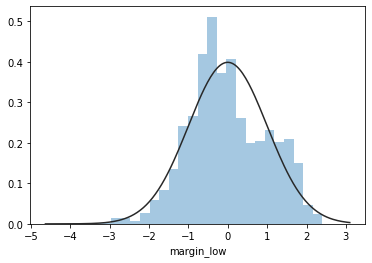

margin_up


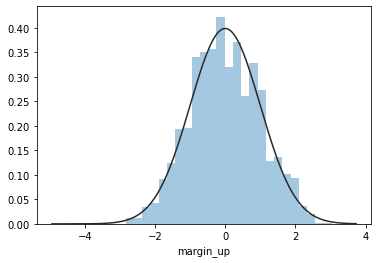

length


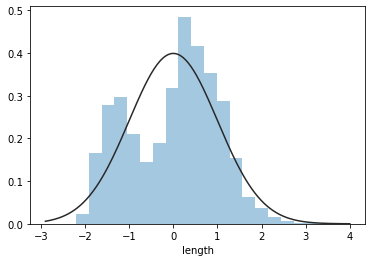

In [46]:
# verification de la distribution gausienne, test de normalité
for col in df_norm.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_norm[col], fit=norm, kde=False)
    print(col)
    plt.show()

In [47]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df_norm:
    w, pvalue = st.shapiro(df_norm[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

diagonal-------------------------------------------------------------- 0.9987456798553467 0.3668380379676819
On ne peux pas rejetter H0: la distribution suit une loi normale
height_left----------------------------------------------------------- 0.998419463634491 0.17826463282108307
On ne peux pas rejetter H0: la distribution suit une loi normale
height_right---------------------------------------------------------- 0.999517023563385 0.9803677201271057
On ne peux pas rejetter H0: la distribution suit une loi normale
margin_low------------------------------------------------------------ 0.9866816997528076 1.6335038877102193e-10
On rejette H0 : la distribution ne suit pas une loi normale
margin_up------------------------------------------------------------- 0.9974827170372009 0.018166132271289825
On rejette H0 : la distribution ne suit pas une loi normale
length---------------------------------------------------------------- 0.9683938026428223 1.3330879147851546e-17
On rejette H0 : la dis

diagonal


<Figure size 432x288 with 0 Axes>

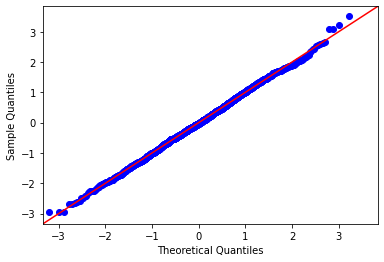

height_left


<Figure size 432x288 with 0 Axes>

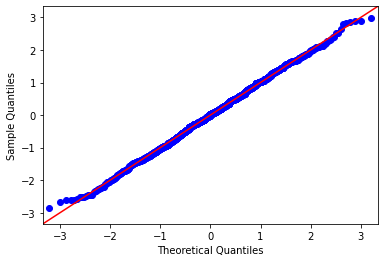

height_right


<Figure size 432x288 with 0 Axes>

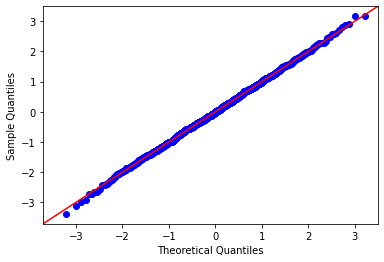

margin_low


<Figure size 432x288 with 0 Axes>

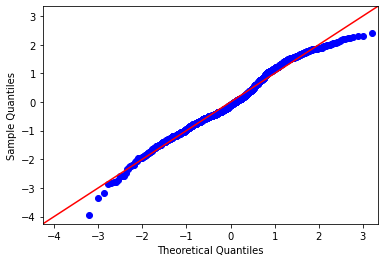

margin_up


<Figure size 432x288 with 0 Axes>

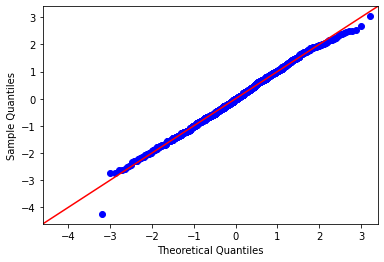

length


<Figure size 432x288 with 0 Axes>

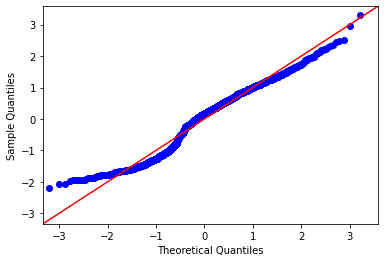

In [48]:
for col in df_norm:
    plt.figure()
    sm.qqplot(df_norm[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

In [49]:
df_norm

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.491040,2.891676,3.163688,0.249099,-1.138084,-0.021901
1,-1.624263,-2.173497,-0.799686,-1.252987,-0.683324,0.352870
2,2.426018,1.527647,-1.291158,0.052905,-0.909273,0.462342
3,-1.945262,-0.413627,0.060449,-1.651656,-0.593729,1.070675
4,-0.751402,0.832460,-1.414022,-0.628895,1.393219,-0.386374
...,...,...,...,...,...,...
1495,0.690484,1.562812,-0.492503,1.249221,-0.954804,-1.519518
1496,0.393579,0.388793,0.767043,1.141634,1.070064,-0.660819
1497,-0.783891,1.457432,0.613431,1.114432,1.906335,-1.951599
1498,2.324954,1.004814,1.504412,1.112212,1.710702,-1.353337


## Train Test set

In [50]:
x = df_norm
y = df['is_genuine']

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8 ,random_state = 45 )

# Kmeans

## Model

In [52]:
model1 = KMeans(n_clusters=2).fit(xtrain, ytrain)
prediction1 = model1.predict(xtest)
prediction1

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [53]:
df_pred = pd.DataFrame(prediction1,index=ytest.index, columns=['cluster'])
df_kmeans = pd.merge(df_pred,df_norm, left_index=True, right_index=True)
df_kmeans

,cluster,diagonal,height_left,height_right,margin_low,margin_up,length
106,0,-0.164467,0.661060,0.674876,-1.736465,-0.152300,0.904009
120,0,-0.491040,-2.604447,-0.000992,-0.736331,-0.371667,0.727352
794,0,-0.197180,0.626894,-1.106859,-1.941449,0.235973,0.575695
1445,1,1.121149,0.018356,-0.216031,-0.463958,0.532302,-1.194633
797,0,0.624417,0.321103,-1.229725,-0.714567,-0.239728,0.116524
...,...,...,...,...,...,...,...
1175,1,-0.816368,0.287315,0.674876,0.710556,0.988366,-1.202235
535,0,0.294837,-0.936782,-1.383307,-0.326290,-0.728288,0.060324
1309,1,-1.108101,0.354929,1.627312,0.838657,2.099877,-1.000203
588,0,-0.718900,-2.512669,0.459822,-1.178019,-0.863856,0.322286


In [54]:
df_false_true = pd.DataFrame(ytest)
df_false_true

,is_genuine
106,0
120,0
794,0
1445,1
797,0
...,...
1175,1
535,0
1309,1
588,0


In [55]:
df_test_kmeans = pd.concat([df_false_true, df_kmeans], axis=1)
df_test_kmeans

,is_genuine,cluster,diagonal,height_left,height_right,margin_low,margin_up,length
106,0,0,-0.164467,0.661060,0.674876,-1.736465,-0.152300,0.904009
120,0,0,-0.491040,-2.604447,-0.000992,-0.736331,-0.371667,0.727352
794,0,0,-0.197180,0.626894,-1.106859,-1.941449,0.235973,0.575695
1445,1,1,1.121149,0.018356,-0.216031,-0.463958,0.532302,-1.194633
797,0,0,0.624417,0.321103,-1.229725,-0.714567,-0.239728,0.116524
...,...,...,...,...,...,...,...,...
1175,1,1,-0.816368,0.287315,0.674876,0.710556,0.988366,-1.202235
535,0,0,0.294837,-0.936782,-1.383307,-0.326290,-0.728288,0.060324
1309,1,1,-1.108101,0.354929,1.627312,0.838657,2.099877,-1.000203
588,0,0,-0.718900,-2.512669,0.459822,-1.178019,-0.863856,0.322286


## Centroides

In [57]:
Centroids = model1.cluster_centers_
Centroids

array([[ 0.07835988, -0.28664308, -0.36568959, -0.54289581, -0.44434902,
         0.57907306],
       [-0.17564522,  0.55672886,  0.68958739,  1.04090738,  0.82365517,
        -1.1364655 ]])

In [58]:
Centroids = pd.DataFrame(Centroids, columns=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
                                             'length'])
Centroids

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.078360,-0.286643,-0.365690,-0.542896,-0.444349,0.579073
1,-0.175645,0.556729,0.689587,1.040907,0.823655,-1.136466


## Matrice de Confusion

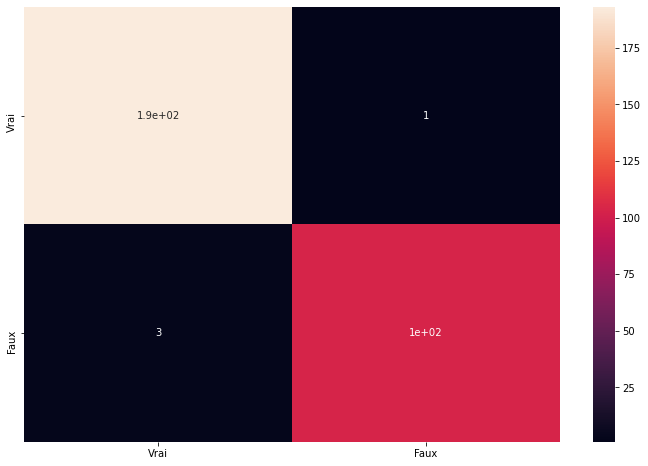

In [59]:
fig = plt.figure(figsize=(12,8))
matrix = confusion_matrix(df_test_kmeans.cluster, df_test_kmeans.is_genuine)
sns.heatmap(matrix, annot=True, xticklabels=["Vrai","Faux"], yticklabels=["Vrai","Faux"])
plt.show()

# Logistic regression

## Model

In [60]:
model2 = LogisticRegression()

In [61]:
logreg = model2.fit(xtrain, ytrain)

In [62]:
prediction2 = logreg.predict(xtest)
prediction2

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0], d

In [63]:
df_pred = pd.DataFrame(prediction2,index=ytest.index, columns=['cluster'])
df_logreg = pd.merge(df_pred,df_norm, left_index=True, right_index=True)
df_logreg

,cluster,diagonal,height_left,height_right,margin_low,margin_up,length
106,0,-0.164467,0.661060,0.674876,-1.736465,-0.152300,0.904009
120,0,-0.491040,-2.604447,-0.000992,-0.736331,-0.371667,0.727352
794,0,-0.197180,0.626894,-1.106859,-1.941449,0.235973,0.575695
1445,1,1.121149,0.018356,-0.216031,-0.463958,0.532302,-1.194633
797,0,0.624417,0.321103,-1.229725,-0.714567,-0.239728,0.116524
...,...,...,...,...,...,...,...
1175,1,-0.816368,0.287315,0.674876,0.710556,0.988366,-1.202235
535,0,0.294837,-0.936782,-1.383307,-0.326290,-0.728288,0.060324
1309,1,-1.108101,0.354929,1.627312,0.838657,2.099877,-1.000203
588,0,-0.718900,-2.512669,0.459822,-1.178019,-0.863856,0.322286


In [64]:
df_test_logreg = pd.concat([df_false_true, df_logreg], axis=1)
df_test_logreg

,is_genuine,cluster,diagonal,height_left,height_right,margin_low,margin_up,length
106,0,0,-0.164467,0.661060,0.674876,-1.736465,-0.152300,0.904009
120,0,0,-0.491040,-2.604447,-0.000992,-0.736331,-0.371667,0.727352
794,0,0,-0.197180,0.626894,-1.106859,-1.941449,0.235973,0.575695
1445,1,1,1.121149,0.018356,-0.216031,-0.463958,0.532302,-1.194633
797,0,0,0.624417,0.321103,-1.229725,-0.714567,-0.239728,0.116524
...,...,...,...,...,...,...,...,...
1175,1,1,-0.816368,0.287315,0.674876,0.710556,0.988366,-1.202235
535,0,0,0.294837,-0.936782,-1.383307,-0.326290,-0.728288,0.060324
1309,1,1,-1.108101,0.354929,1.627312,0.838657,2.099877,-1.000203
588,0,0,-0.718900,-2.512669,0.459822,-1.178019,-0.863856,0.322286


## Matrice de Confusion

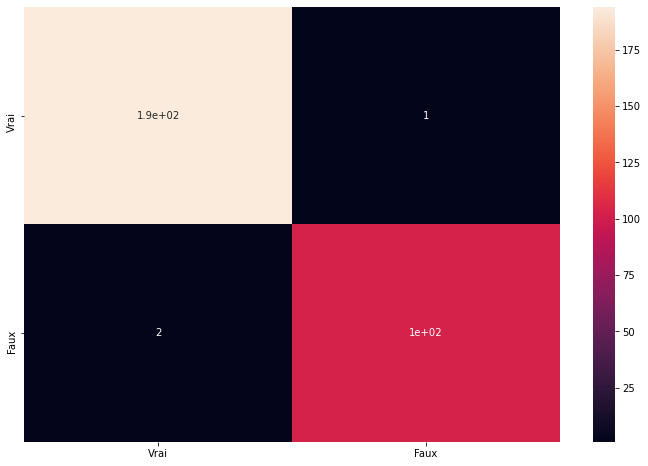

In [65]:
fig = plt.figure(figsize=(12,8))
matrix = confusion_matrix(df_test_logreg.cluster, df_test_logreg.is_genuine)
sns.heatmap(matrix, annot=True, xticklabels=["Vrai","Faux"], yticklabels=["Vrai","Faux"])
plt.show()

# KNeighborsClassifier

In [ ]:
# initialize model
model = KNeighborsClassifier()

In [ ]:
knn = model.fit(X, y)

In [ ]:
knn.score(X,y)

In [ ]:
knn.predict(X_test)

# RandomForestClassifier

In [ ]:
# initialize model
model = RandomForestClassifier()

In [ ]:
model.fit(X,y)

In [ ]:
model.score(X,y)

In [ ]:
model.predict(X_test)

# Export Model

In [ ]:
joblib.dump(logreg,'models/logreg.model')